# Einav Diar
## Corona Data Anlysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [3]:
df.to_clipboard(index=False,header=False)

In [11]:
url = 'corona_data.csv'
data = pd.read_csv(url)
data.tail(2)

,City_Name,City_Code,Date,verified_cases,recovered,deaths,number_of_tests,number_of_diagnostic_tests,colour,final_score,month,year
157358,ירושלים,3000,11/01/2021,1974.0,1050.0,3.0,12987.0,12771.0,red,9.0,1,2021
157359,ירושלים,3000,18/01/2021,2105.0,1221.0,4.0,12353.0,12160.0,red,9.2,1,2021


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157360 entries, 0 to 157359
Data columns (total 12 columns):
City_Name                     157360 non-null object
City_Code                     157360 non-null int64
Date                          157360 non-null object
verified_cases                157079 non-null float64
recovered                     157079 non-null float64
deaths                        157079 non-null float64
number_of_tests               157079 non-null float64
number_of_diagnostic_tests    157079 non-null float64
colour                        157360 non-null object
final_score                   157360 non-null float64
month                         157360 non-null int64
year                          157360 non-null int64
dtypes: float64(6), int64(3), object(3)
memory usage: 14.4+ MB


# Q1 (10%)

In [49]:
data.isnull().sum()

City_Name                       0
City_Code                       0
Date                            0
verified_cases                281
recovered                     281
deaths                        281
number_of_tests               281
number_of_diagnostic_tests    281
colour                          0
final_score                     0
month                           0
year                            0
dtype: int64

#### מכוון שישנם ערכים חסרים בטבלה בעמודות של מספר מאומתים, מחלימים, מתים ומספר בדיקות, תיקון הערכים ע"י חציון, ממוצע, או מחיקת עמודות לא ישקף את המידע נכון.

#### לכן, בחרתי למלא את הערכים החסרים לפי הערך שהיה יום קודם/לאחר מכן.

#### דעתי נובעת מההנחה כי לדוגמה במהלך "גל קורונה" יש מספר מאומתים דומה בכל יום, כמות בדיקות גבוהה ודומה וכו.

In [50]:
data[['verified_cases']]=data[['verified_cases']].fillna(method='bfill')

In [51]:
data[['recovered']]=data[['recovered']].fillna(method='bfill')

In [52]:
data[['deaths']]=data[['deaths']].fillna(method='bfill')

In [53]:
data[['number_of_tests']]=data[['number_of_tests']].fillna(method='bfill')

In [54]:
data[['number_of_diagnostic_tests']]=data[['number_of_diagnostic_tests']].fillna(method='bfill')

In [55]:
data.isnull().sum()

City_Name                     0
City_Code                     0
Date                          0
verified_cases                0
recovered                     0
deaths                        0
number_of_tests               0
number_of_diagnostic_tests    0
colour                        0
final_score                   0
month                         0
year                          0
dtype: int64

# Q2 (15%)

#### הצגתי את הנתונים עבור שנת 2021 בעיר שמספר הקוד שלה הוא 7000

In [143]:
new= data.loc[(data.City_Code==7000) & (data.year ==2021)]
new.head()

,City_Name,City_Code,Date,verified_cases,recovered,deaths,number_of_tests,number_of_diagnostic_tests,colour,final_score,month,year
44483,לוד,7000,2021-03-20,0.0,13.0,0.0,93.0,92.0,green,4.4,3,2021
44484,לוד,7000,2021-03-31,0.0,17.0,0.0,223.0,215.0,green,2.4,3,2021
44485,לוד,7000,2021-07-04,0.0,7.0,0.0,900.0,869.0,green,2.7,4,2021
44486,לוד,7000,2021-08-04,0.0,6.0,0.0,380.0,371.0,green,2.7,4,2021
44487,לוד,7000,2021-11-04,0.0,16.0,0.0,264.0,261.0,green,2.2,4,2021


#### הצגתי את התאריך בו מספר מאומתי הקורונה היה מקסימלי

In [144]:
q2=new
q2=new.verified_cases.max()
max=new.loc[new['verified_cases']==q2]
max[['Date']]

,Date
156329,2021-09-20


# Q3 (15%)

#### הדפסתי את ממוצע החולים המאומתים בכל חודש

,verified_cases
month,
1,73.290323
2,63.392857
3,19.741935
4,1.933333
5,1.258065
6,0.266667
7,8.612903
8,70.193548
9,82.428571


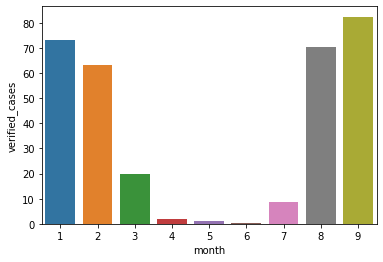

In [165]:
sns.barplot(x='month',y='verified_cases',ci = None, data=new)
new.groupby('month')[['verified_cases']].mean()

# Q4 (15%)

#### הצגתי היסטוגרמה של מספר חולי הקורונה המאומתים בחודש אוגוסט

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


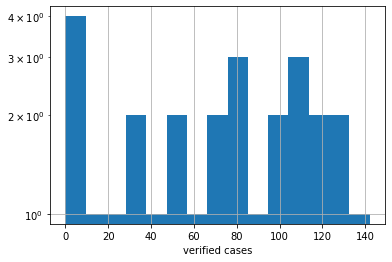

In [174]:
new['Date'] = pd.to_datetime(new['Date'])
q4=new[(new['Date'].dt.month==8)]
q4['verified_cases'].hist(bins=15)
plt.xlabel("verified cases")
plt.yscale('log')
plt.show()

# Q5 (15%)

#### יצרתי טבלה בה הצגתי את מספר המאומתים, מחלימים ומספר הבדיקות לפי חודש

In [166]:
new.groupby(['month'])[['verified_cases','recovered','number_of_tests']].count().reset_index()

,month,verified_cases,recovered,number_of_tests
0,1,31,31,31
1,2,28,28,28
2,3,31,31,31
3,4,30,30,30
4,5,31,31,31
5,6,30,30,30
6,7,31,31,31
7,8,31,31,31
8,9,21,21,21


# Q6 (30%)

#### חישבתי את הקורלציה לפי מדד פרסון וחיפשתי את הקורלציה הכי גבוהה

In [108]:
new.corr(method='pearson')

,City_Code,verified_cases,recovered,deaths,number_of_tests,number_of_diagnostic_tests,final_score,month,year
City_Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
verified_cases,NaN,1.000000,0.666186,0.455154,0.743453,0.741108,0.794880,-0.024402,NaN
recovered,NaN,0.666186,1.000000,0.400732,0.487623,0.481344,0.692480,-0.116369,NaN
deaths,NaN,0.455154,0.400732,1.000000,0.261771,0.259598,0.398230,-0.161442,NaN
number_of_tests,NaN,0.743453,0.487623,0.261771,1.000000,0.999902,0.620877,0.153901,NaN
number_of_diagnostic_tests,NaN,0.741108,0.481344,0.259598,0.999902,1.000000,0.619015,0.158013,NaN
final_score,NaN,0.794880,0.692480,0.398230,0.620877,0.619015,1.000000,-0.098151,NaN
month,NaN,-0.024402,-0.116369,-0.161442,0.153901,0.158013,-0.098151,1.000000,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


אני משערת שבשתי העמודות של קוד עיר ושנה לא מופיע ערך מכוון שכל הערכים בטבלה שלי זהים. (2021 ו7000)

#### ניתן לראות ששתי הקורלציות הכי גבוהות הן 0.7948 ו 0.999

#### בחרתי להציג את הקורלציות בעזרת גרף שישווה באופן ברור בין שני הצירים


#### ניתן לראות בשני האיורים ששני הצירים עולים יחדיו.

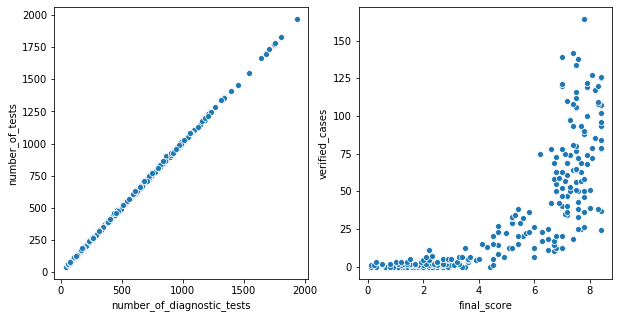

In [173]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(x = 'number_of_diagnostic_tests', y = 'number_of_tests', data=new, ax = axes[0])
sns.scatterplot(x = 'final_score', y = 'verified_cases', data=new, ax = axes[1])
plt.show()

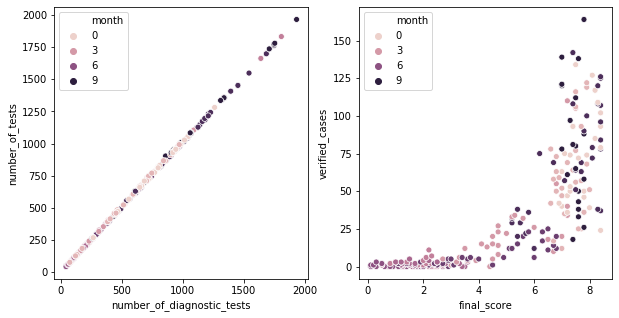

In [115]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(x = 'number_of_diagnostic_tests', y = 'number_of_tests',hue = 'month', data=new, ax = axes[0])
sns.scatterplot(x = 'final_score', y = 'verified_cases',hue = 'month', data=new, ax = axes[1])
plt.show()